[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ryan9dai/XAI590_Ryan/blob/main/XAI_Assignment9.ipynb)

In [ ]:
# pip install datasets sentence-transformers scikit-learn umap-learn matplotlib numpy

In [1]:
import pandas as pd
from datasets import load_dataset
from sentence_transformers import SentenceTransformer

#Load embedding model
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

#Load dataset
ds = load_dataset("ag_news")

#Convert to dataframe and print basic data
df = pd.DataFrame(ds["train"])
df.info()
print(df.head())

#Forward pass dataset through model
embeddings = model.encode(df.iloc[0:10000,0].tolist(), convert_to_numpy=True)

#This section written by me with some targeted questions to ChatGPT 4o on 3/24/25

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    120000 non-null  object
 1   label   120000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB
                                                text  label
0  Wall St. Bears Claw Back Into the Black (Reute...      2
1  Carlyle Looks Toward Commercial Aerospace (Reu...      2
2  Oil and Economy Cloud Stocks' Outlook (Reuters...      2
3  Iraq Halts Oil Exports from Main Southern Pipe...      2
4  Oil prices soar to all-time record, posing new...      2


C:\Users\ryan9\Documents\Projects\XAI\Xvenv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ryan9\Documents\Projects\XAI\Xvenv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


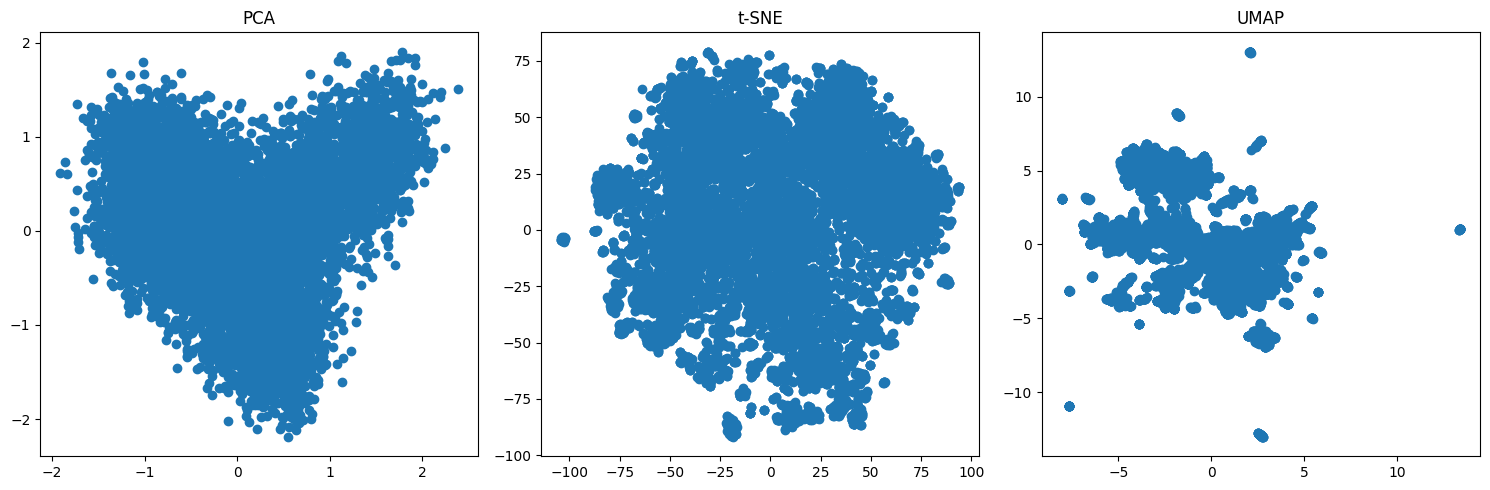

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(embeddings)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(embeddings)

# UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(embeddings)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(X_pca[:, 0], X_pca[:, 1])
axes[0].set_title("PCA")

axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1])
axes[1].set_title("t-SNE")

axes[2].scatter(X_umap[:, 0], X_umap[:, 1])
axes[2].set_title("UMAP")

plt.tight_layout()
plt.show()

# This section written by ChatGPT 4o on 3/24/25 - simply reducing the dimensionality using the appropriate library function and plotting

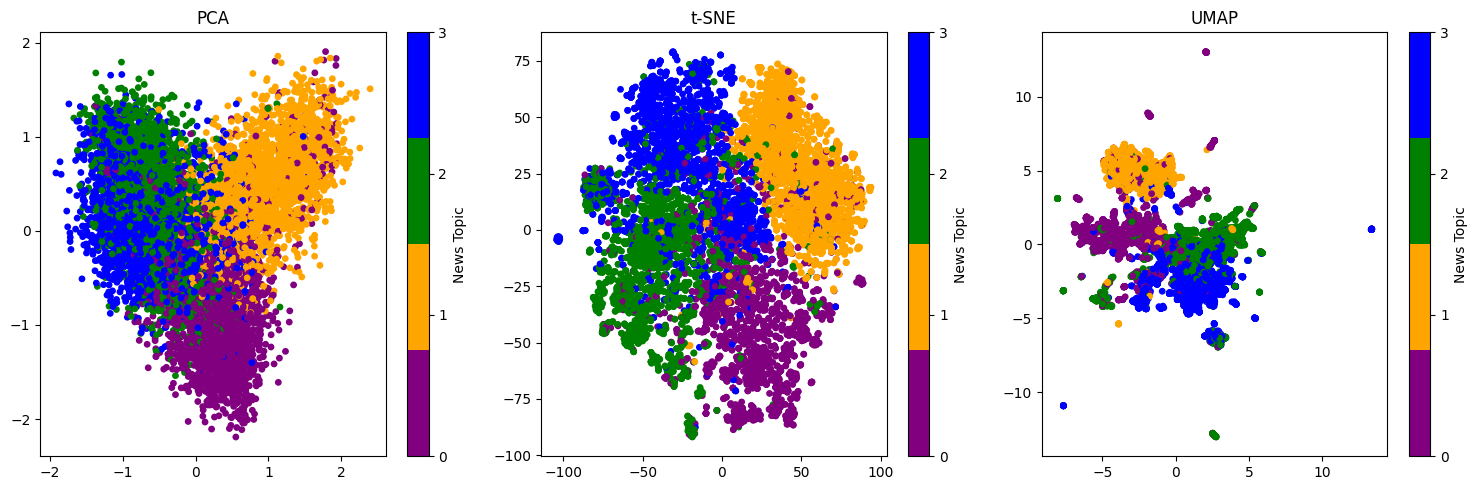

In [5]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Use class labels (0=World, 1=Sports, 2=Business, 3=Sci/Tech) as colors
colors = df["label"].to_numpy()[:10000]

# Optional: Use a discrete colormap for clarity
cmap = ListedColormap(['purple', 'orange', 'green', 'blue'])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sc0 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=colors, cmap=cmap, s=15)
axes[0].set_title("PCA")
plt.colorbar(sc0, ax=axes[0], ticks=[0, 1, 2, 3], label="News Topic")

sc1 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, cmap=cmap, s=15)
axes[1].set_title("t-SNE")
plt.colorbar(sc1, ax=axes[1], ticks=[0, 1, 2, 3], label="News Topic")

sc2 = axes[2].scatter(X_umap[:, 0], X_umap[:, 1], c=colors, cmap=cmap, s=15)
axes[2].set_title("UMAP")
plt.colorbar(sc2, ax=axes[2], ticks=[0, 1, 2, 3], label="News Topic")

plt.tight_layout()
plt.show()

# This section written by ChatGPT 4o on 3/24/25 — assigns each data point a color based on its topic label
# using the AG News dataset (0=World, 1=Sports, 2=Business, 3=Sci/Tech)


# Analysis

PCA separates the datapoints reasonably well, with distinct color regions, but there is a lot of overlap between topics. It is fine to see the overall structure but is not particularly good at separating meanings. You can see that the shape is not very uniform, which means there is some meaning to the spacing between the points.

t-SNE shows very distinct, spread color regions, with relatively clear separation. However, each region has a similar spacing, so the distance between points does not mean very much.

UMAP shows highly separate color regions with the least overlap, and topic 1 = sports is very distinct from all other topics. The shape is also unique and not regular, which suggests more meaning embedded in the layout.

Overall, UMAP appears to be the most useful, with a middle ground of separation and topological meaning, with t-SNE and PCA having their own strengths and weaknesses.